In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import time
import _load_by_step

In [2]:
def convert_to_360(lon):
    return float(np.remainder(lon + 360, 360))

In [3]:
### Domain Specification
lonmin=-54
lonmax=-31
latmin=-36
latmax=7

units = 1e9 #Gb units

## NCEP GFS Dataset

The [NCEP operational Global Forecast System](https://rda.ucar.edu/datasets/d084001/) analysis and forecast grids are on a 0.25 by 0.25 global latitude longitude grid. Here we use the **_load_by_step()_** accessor to retrieve this dataset.


In [4]:
gfs = xr.open_dataset('https://thredds.rda.ucar.edu/thredds/dodsC/files/g/d084001/2015/20150115/gfs.0p25.2015011500.f000.grib2')

In [5]:
gfs_r  = gfs['Temperature_surface']

In [6]:
gfs_l = gfs_r[0].load()

In [8]:
gfs_lb = gfs_r.lbs.load_by_step(lat=5)

Donwloading '5.8KB' of 'Temperature_surface' between lat=[-90.0, -90.0]: 100%|██████████| 145/145 [00:00<00:00, 372.52it/s]   


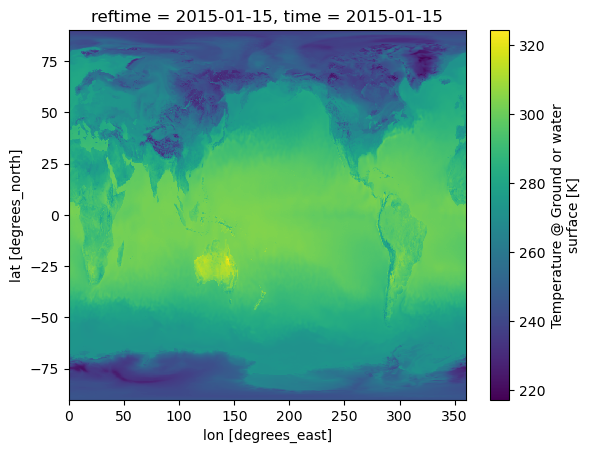

In [9]:
gfs_lb[0].plot()

## NCEP-NCAR Reanalysis 1 

The [NCEP/NCAR Reanalysis 1](https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.html) consists of 4x daily, daily and monthly atmospheric model output from 1948 to near present in a 2.5° horizontal resolution grid. If the _xarray_ **_load()_** request gets higher than 500MB, a syntax error message is displayed (as below). However, using the **_load_by_step()_** function allows to successfully load the data. 

In [10]:
winddata = xr.open_dataset('http://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis/Monthlies/pressure/air.4Xday.1981-2010.ltm.nc',decode_times=False)

/home/.pixi/envs/default/lib/python3.12/site-packages/xarray/coding/times.py:170: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [11]:
try:
    winddata['air'].load()
except:
    print("ERROR")

syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: Request^ Too Large: 1043.63136 Mbytes, max=500.0
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: Request^ Too Large: 1043.63136 Mbytes, max=500.0
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: Request^ Too Large: 1043.63136 Mbytes, max=500.0


ERROR


In [12]:
testwind = winddata['air'].lbs.load_by_step(time=10)

Donwloading '7.1MB' of 'air' between time=[-15761052.0, -15760998.0]: 100%|██████████| 146/146 [03:32<00:00,  1.45s/it]


In [13]:
testwind

<xarray.DataArray 'air' (time: 1460, level: 17, lat: 73, lon: 144)> Size: 1GB
array([[[[247.39668, 247.39668, 247.39668, ..., 247.39668, 247.39668,
          247.39668],
         [246.90068, 246.977  , 247.05334, ..., 246.63335, 246.727  ,
          246.82   ],
         [247.60667, 247.77368, 247.92001, ..., 247.03033, 247.24368,
          247.44   ],
         ...,
         [273.61368, 273.59033, 273.547  , ..., 273.66034, 273.65366,
          273.63367],
         [272.14   , 272.11667, 272.09   , ..., 272.23035, 272.21033,
          272.187  ],
         [271.43   , 271.43   , 271.43   , ..., 271.43   , 271.43   ,
          271.43   ]],

        [[252.40334, 252.40334, 252.40334, ..., 252.40334, 252.40334,
          252.40334],
         [253.21667, 253.25334, 253.27367, ..., 253.09334, 253.14667,
          253.177  ],
         [253.78334, 253.91335, 254.02368, ..., 253.26701, 253.46   ,
          253.63734],
...
         [242.46335, 242.45035, 242.447  , ..., 242.52667, 242.49335,
          242.46335],
         [242.53668, 242.53334, 242.53668, ..., 242.56001, 242.54668,
          242.54668],
         [242.77667, 242.77667, 242.77667, ..., 242.77667, 242.77667,
          242.77667]],

        [[210.46   , 210.46   , 210.46   , ..., 210.46   , 210.46   ,
          210.46   ],
         [208.87001, 208.89001, 208.92334, ..., 208.81668, 208.83002,
          208.84668],
         [207.50334, 207.54668, 207.60667, ..., 207.42334, 207.42334,
          207.46   ],
         ...,
         [251.78668, 251.8    , 251.81334, ..., 251.68668, 251.73668,
          251.76668],
         [251.46667, 251.48001, 251.48334, ..., 251.41667, 251.43001,
          251.43335],
         [250.89001, 250.89001, 250.89001, ..., 250.89001, 250.89001,
          250.89001]]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * level    (level) float32 68B 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 292B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * time     (time) float64 12kB -1.577e+07 -1.577e+07 ... -1.576e+07 -1.576e+07
Attributes: (12/13)
    long_name:     Long Term Mean 4xDaily Air temperature
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    ...            ...
    statistic:     Long Term Mean
    parent_stat:   Individual Obs
    valid_range:   [150. 350.]
    actual_range:  [182.61334 322.38034]
    dataset:       NCEP Reanalysis Derived Products
    _ChunkSizes:   [  1   1  73 144]

## Altimeter SSH from a local file
The **_load_by_step()_** _accessor_ can also be used to split a huge amount of local data while loading it to the memory, as we can see in the example below, using grided maps of SSH delivered from altimetry by AVISO.

In [9]:
ssh_alt = xr.open_dataset('/home/jovyan/ohw24_proj_xarray_load_by_step_us/data/adt93-19.nc')
ssh_alt

<xarray.Dataset> Size: 859MB
Dimensions:    (time: 9928, latitude: 53, longitude: 204)
Coordinates:
  * time       (time) datetime64[ns] 79kB 1993-01-01 1993-01-02 ... 2020-03-07
  * latitude   (latitude) float32 212B -32.88 -32.62 -32.38 ... -20.12 -19.88
  * longitude  (longitude) float32 816B 309.1 309.4 309.6 ... 359.4 359.6 359.9
Data variables:
    adt        (time, latitude, longitude) float64 859MB ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               2020-03-07T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2020-03-07T00:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...
    History:                         Translated to CF-1.0 Conventions by Netc...

In [9]:
ssh_alt = xr.open_dataset('/home/jovyan/ohw24_proj_xarray_load_by_step_us/data/adt93-19.nc')
ssh_alt

<xarray.Dataset> Size: 859MB
Dimensions:    (time: 9928, latitude: 53, longitude: 204)
Coordinates:
  * time       (time) datetime64[ns] 79kB 1993-01-01 1993-01-02 ... 2020-03-07
  * latitude   (latitude) float32 212B -32.88 -32.62 -32.38 ... -20.12 -19.88
  * longitude  (longitude) float32 816B 309.1 309.4 309.6 ... 359.4 359.6 359.9
Data variables:
    adt        (time, latitude, longitude) float64 859MB ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               2020-03-07T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2020-03-07T00:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...
    History:                         Translated to CF-1.0 Conventions by Netc...

In [10]:
st_time_load_lbs = time.time()
ssh_loadbs = ssh_alt['adt'].lbs.load_by_step(time=3)
end_time_load_lbs = time.time()
del ssh_loadbs

Donwloading '43.2KB' of 'adt' between time=[2020-03-07T00:00:00.000000000, 2020-03-07T00:00:00.000000000]: 100%|██████████| 3310/3310 [00:12<00:00, 264.97it/s] 


In [11]:
st_time_load = time.time()
ssh_load = ssh_alt['adt'].load()
end_time_load = time.time()
del ssh_load

In [12]:
end_time_load-st_time_load

1.4300432205200195

In [13]:
end_time_load_lbs-st_time_load_lbs

14.51642656326294